In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pandas as pd

data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:-2], columns=names)
df=df.drop(columns=['no_name'])
df.head().T

,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.020,1.020,1.010,1.005,1.010
al,1,4,2,4,2
su,0,0,3,0,0
rbc,?,?,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,?,423,117,106


In [3]:
df.su

0      0
1      0
2      3
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: su, Length: 400, dtype: object

In [4]:
import pandas as pd
import numpy as np

# Misalnya, DataFrame Anda disimpan dalam variabel df
# Ganti nilai yang tidak diinginkan (seperti "\t?") dengan NaN
df.replace('?', np.nan, inplace=True)

# Konversi kolom-kolom tertentu ke tipe data float
intt = ['su','al','sg',
        'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

# Menggunakan pd.to_numeric untuk mengonversi ke float dan kemudian astype(float)
df[intt] = df[intt].apply(pd.to_numeric, errors='coerce').astype(float)

# Sekarang, kolom-kolom yang diinginkan telah diubah menjadi tipe data float


In [5]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [6]:
# Misalnya, DataFrame Anda disimpan dalam variabel df_nums_temp
# Cek nilai unik dalam kolom 'dm'
for i in range (len(df_objs.columns)):
    unique_dm_values = df_objs[df_objs.columns[i]].unique()


    # Tampilkan nilai unik atau distribusi nilai
    print("Unique values:",df_objs.columns[i], unique_dm_values)



Unique values: rbc [nan 'normal' 'abnormal']
Unique values: pc ['normal' 'abnormal' nan]
Unique values: pcc ['notpresent' 'present' nan]
Unique values: ba ['notpresent' 'present' nan]
Unique values: htn ['yes' 'no' nan]
Unique values: dm ['yes' 'no' ' yes' '\tno' '\tyes' nan '']
Unique values: cad ['no' 'yes' '\tno' nan]
Unique values: appet ['good' 'poor' nan 'no']
Unique values: pe ['no' 'yes' nan 'good']
Unique values: ane ['no' 'yes' nan]
Unique values: class ['ckd' 'ckd\t' 'notckd' 'no']


In [7]:
#fix dn
df_objs['dm'] = df_objs['dm'].replace(['yes', ' yes', '\tyes'], 'yes')
df_objs['dm'] = df_objs['dm'].replace( ['no' ,'\tno'  ] , 'no')
df_objs['dm'] = df_objs['dm'].replace( [''] , np.nan)

#fix cad
df_objs['cad'] = df_objs['cad'].replace( ['no' ,'\tno'  ] , 'no')

#fix appet
df_objs['appet'] = df_objs['appet'].replace( ['no'] , 'poor')

#fix pe
df_objs['pe'] = df_objs['pe'].replace( ['good'] , 'no')

#fix class
df_objs['class'] = df_objs['class'].replace( ['ckd\t'] , 'ckd')
df_objs['class'] = df_objs['class'].replace( ['no'] , 'notckd')

In [8]:
# Misalnya, DataFrame Anda disimpan dalam variabel df_nums_temp
# Cek nilai unik dalam kolom 'dm'
for i in range (len(df_objs.columns)):
    unique_dm_values = df_objs[df_objs.columns[i]].unique()


    # Tampilkan nilai unik atau distribusi nilai
    print("Unique values:",df_objs.columns[i], unique_dm_values)



Unique values: rbc [nan 'normal' 'abnormal']
Unique values: pc ['normal' 'abnormal' nan]
Unique values: pcc ['notpresent' 'present' nan]
Unique values: ba ['notpresent' 'present' nan]
Unique values: htn ['yes' 'no' nan]
Unique values: dm ['yes' 'no' nan]
Unique values: cad ['no' 'yes' nan]
Unique values: appet ['good' 'poor' nan]
Unique values: pe ['no' 'yes' nan]
Unique values: ane ['no' 'yes' nan]
Unique values: class ['ckd' 'notckd']


In [9]:
df_objs.isnull().sum()

rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
def objeck_cepat(df_ojk,yu):
    df_copy = df_ojk.copy() 
    threshold = len(df_copy) / 100 * yu
    columns_to_drop= df_copy.isnull().sum() < threshold
    selected_columns = columns_to_drop[columns_to_drop].index
    for i in range(len(df_copy.columns)):
        for j in range(len(selected_columns )):
            if df_copy.columns[i]==selected_columns[j] :
                df_copy[df_copy.columns[i]]=df_copy[df_copy.columns[i]].fillna(df_copy[df_copy.columns[i]].describe().top)
    return df_copy


In [11]:
df_objs_imp=objeck_cepat(df_objs,5)

In [12]:
df_objs_imp.isnull().sum()

rbc      152
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [13]:
def int_cepat(df_intt,yu):
    df_copy = df_intt.copy()
    threshold = len(df_copy) / 100 * yu
    columns_to_drop= df_copy.isnull().sum() < threshold
    selected_columns = columns_to_drop[columns_to_drop].index
    for i in range(len(df_copy.columns)):
        for j in range(len(selected_columns )):
            if df_copy.columns[i]==selected_columns[j] :
                 df_copy[df_copy.columns[i]]=df_copy[df_copy.columns[i]].fillna(df_copy[df_copy.columns[i]].mean())
    return df_copy


In [14]:
df_nums_imp=int_cepat(df_nums,5)

In [15]:
df_nums_imp.isnull().sum()

age       0
bp        0
sg       47
al       46
su       49
bgr      44
bu        0
sc        0
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64

In [16]:
df_m=pd.concat([df_nums_imp,df_objs_imp],axis=1)
df_pakai=pd.concat([df_nums_imp,df_objs_imp],axis=1)
df_pakai.isnull().sum()

age        0
bp         0
sg        47
al        46
su        49
bgr       44
bu         0
sc         0
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
rbc      152
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [17]:
df_m

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [18]:


df_m.rbc = df_m.rbc.replace({'normal':0, 'abnormal':1})
df_m.pc = df_m.pc.replace({'normal':0, 'abnormal' : 1})
df_m.pcc = df_m.pcc.replace({'notpresent':0, 'present' : 1})
df_m.ba = df_m.ba.replace({'notpresent':0, 'present' : 1})
df_m.htn = df_m.htn.replace({'no':0,'yes' : 1})
df_m.dm = df_m.dm.replace({'no': 0,'yes' : 1})
df_m.cad = df_m.cad.replace({'no':0,'yes' : 1})
df_m.appet = df_m.appet.replace({'good':0,'poor' : 1})
df_m.pe = df_m.pe.replace({'no':0,'yes' : 1})
df_m.ane = df_m.ane.replace({'no':0,'yes' : 1})
df_m['class'] = df_m['class'].replace({'notckd':0,'ckd' : 1})



<AxesSubplot:>

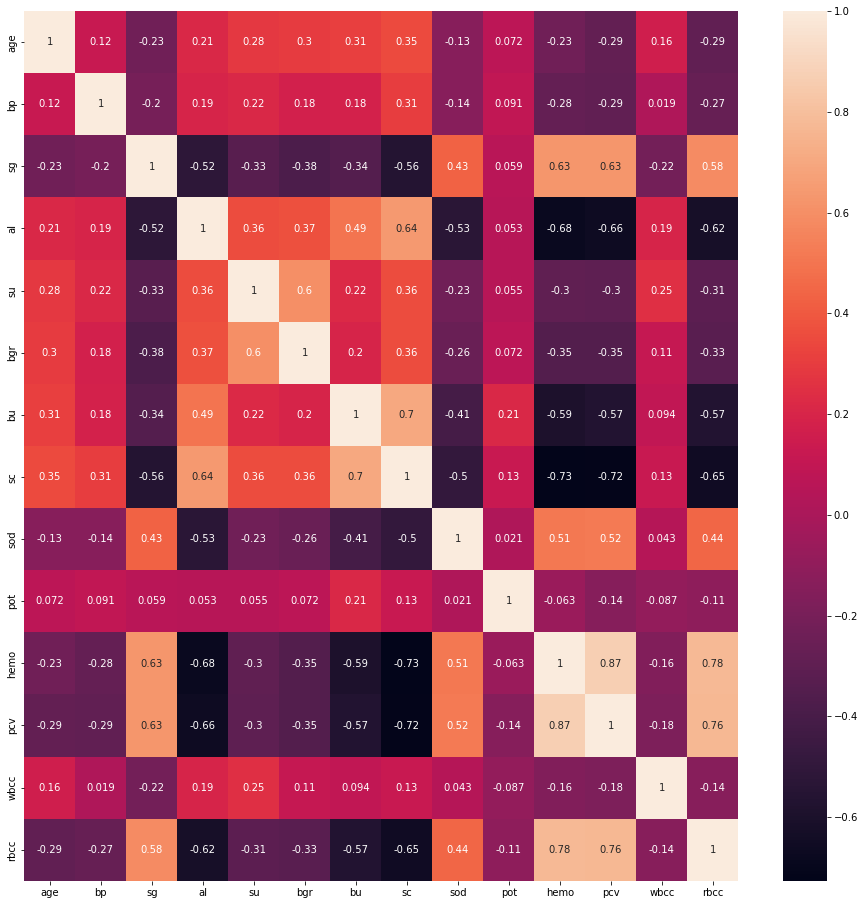

In [19]:

# Spearman Correlation 
plt.figure(figsize = (16,16))
sns.heatmap(df_nums.corr(method = 'spearman'), annot = True)



In [20]:
def corelation_for_imp(data ,treshold):
    data_corr=[]
    cor_matrix=data.corr()
    
    for i in range(len(cor_matrix.columns)):
        data_corr_temp=[]
        #print('\n',data.columns[i])
        data_corr_temp.append(data.columns[i])
        
        
        for j in range(len(cor_matrix.columns)):
             #print(cor_matrix.iloc[i,j],i,j)
            if abs(cor_matrix.iloc[i,j])>=treshold and cor_matrix.iloc[i,j]!=1:
                data_corr_temp.append([data.columns[j],cor_matrix.iloc[i,j]])
            if j==len(cor_matrix.columns)-1 and len(data_corr_temp)!=1:
                data_corr_temp.insert(0,len(data_corr_temp)-1)
                data_corr.append(data_corr_temp)
                #print(len(data_corr_temp))
    return data_corr
p=corelation_for_imp(df_nums,0.5)
pdf=pd.DataFrame(p)
df2 = pdf.sort_values(1, ascending=False)
df2

,0,1,2,3,4,5,6
2,1,su,"[bgr, 0.7178267668666227]",None,None,None,None
6,1,sod,"[sc, -0.6901578920579902]",None,None,None,None
0,3,sg,"[hemo, 0.602582277611133]","[pcv, 0.6035599000086799]","[rbcc, 0.5794757530039493]",None,None
5,2,sc,"[bu, 0.5863678207097766]","[sod, -0.6901578920579902]",None,None,None
9,5,rbcc,"[sg, 0.5794757530039493]","[al, -0.5664367099595836]","[bu, -0.5790865252805201]","[hemo, 0.798880246744564]","[pcv, 0.7916252713729907]"
8,5,pcv,"[sg, 0.6035599000086799]","[al, -0.6118911251338759]","[bu, -0.6076213553320026]","[hemo, 0.8953817669928061]","[rbcc, 0.7916252713729907]"
7,5,hemo,"[sg, 0.602582277611133]","[al, -0.6346317780901195]","[bu, -0.6103602784857799]","[pcv, 0.8953817669928061]","[rbcc, 0.798880246744564]"
4,4,bu,"[sc, 0.5863678207097766]","[hemo, -0.6103602784857799]","[pcv, -0.6076213553320026]","[rbcc, -0.5790865252805201]",None
3,1,bgr,"[su, 0.7178267668666227]",None,None,None,None
1,3,al,"[hemo, -0.6346317780901195]","[pcv, -0.6118911251338759]","[rbcc, -0.5664367099595836]",None,None


In [21]:
a=['sg', ['hemo', 0.602582277611133], ['pcv', 0.6035599000086799], ['rbcc', 0.5794757530039493]]
a.insert(1,0)
a

['sg',
 0,
 ['hemo', 0.602582277611133],
 ['pcv', 0.6035599000086799],
 ['rbcc', 0.5794757530039493]]

In [22]:
def inputrand(df_z):
    dfg=df_z.copy()

    for col in dfg.columns:
        if dfg[col].dtypes == 'object':
                dfg[col] = dfg[col].fillna(2)
                print(dfg[col])
        else:
            dfg[col] = dfg[col].fillna(999)
            print(dfg[col])
    return dfg
df_m_kosong=df_m.copy()
df_m=inputrand(df_m)

df_m

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64
0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64
0      1.020
1      1.020
2      1.010
3      1.005
4      1.010
       ...  
395    1.020
396    1.025
397    1.020
398    1.025
399    1.025
Name: sg, Length: 400, dtype: float64
0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: al, Length: 400, dtype: float64
0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: su, Length: 400, dtype: float64
0      121.0
1      999.0
2      423.0
3      117.0
4      106.0
       ...  
395    140.0
396     75.0
397    100.0
398    114.0
399    131.0
Name: bgr, Length

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,999.0,999.0,...,0.0,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,999.0,18.0,0.8,999.0,999.0,...,0.0,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,999.0,999.0,...,0.0,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1.0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,999.0,999.0,...,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0.0,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0.0,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0.0,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,0.0,0,0,0,0,0,0,0,0,0


In [23]:
df_m.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [24]:
pdf

,0,1,2,3,4,5,6
0,3,sg,"[hemo, 0.602582277611133]","[pcv, 0.6035599000086799]","[rbcc, 0.5794757530039493]",None,None
1,3,al,"[hemo, -0.6346317780901195]","[pcv, -0.6118911251338759]","[rbcc, -0.5664367099595836]",None,None
2,1,su,"[bgr, 0.7178267668666227]",None,None,None,None
3,1,bgr,"[su, 0.7178267668666227]",None,None,None,None
4,4,bu,"[sc, 0.5863678207097766]","[hemo, -0.6103602784857799]","[pcv, -0.6076213553320026]","[rbcc, -0.5790865252805201]",None
5,2,sc,"[bu, 0.5863678207097766]","[sod, -0.6901578920579902]",None,None,None
6,1,sod,"[sc, -0.6901578920579902]",None,None,None,None
7,5,hemo,"[sg, 0.602582277611133]","[al, -0.6346317780901195]","[bu, -0.6103602784857799]","[pcv, 0.8953817669928061]","[rbcc, 0.798880246744564]"
8,5,pcv,"[sg, 0.6035599000086799]","[al, -0.6118911251338759]","[bu, -0.6076213553320026]","[hemo, 0.8953817669928061]","[rbcc, 0.7916252713729907]"
9,5,rbcc,"[sg, 0.5794757530039493]","[al, -0.5664367099595836]","[bu, -0.5790865252805201]","[hemo, 0.798880246744564]","[pcv, 0.7916252713729907]"


<AxesSubplot:>

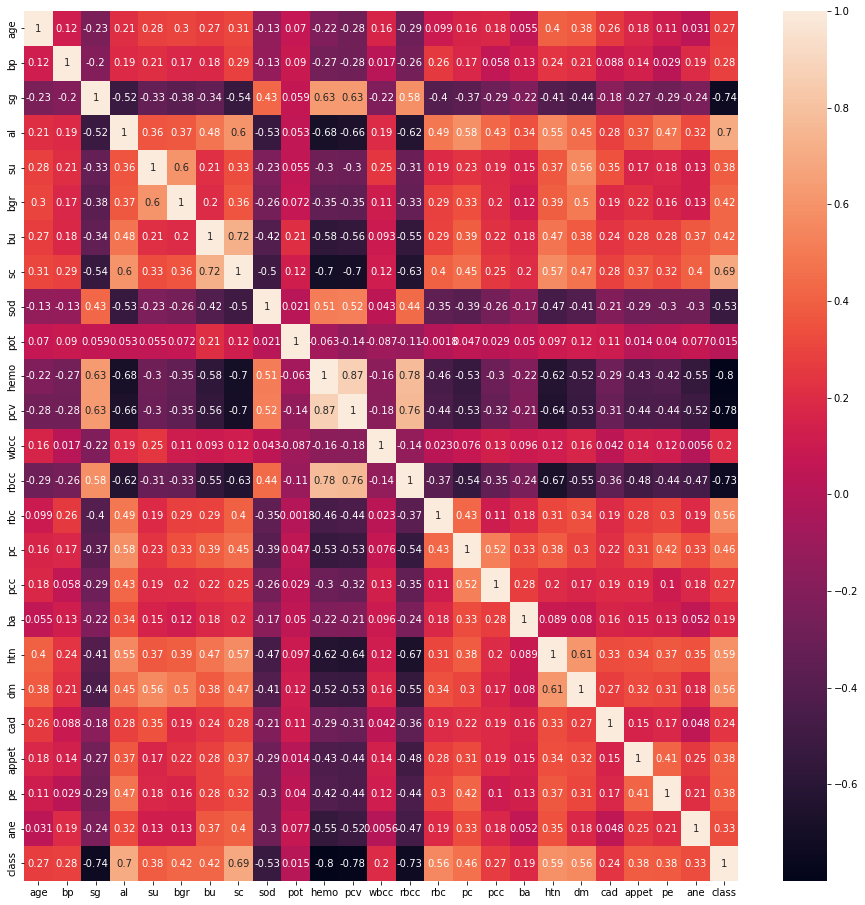

In [25]:
# Spearman Correlation 
plt.figure(figsize = (16,16))
sns.heatmap(df_m_kosong.corr(method = 'spearman'), annot = True)

In [26]:
df_m.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [27]:
p=corelation_for_imp(df_m_kosong,0.5)
pdf=pd.DataFrame(p)
df2 = pdf.sort_values(0, ascending=True)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
6,1,sod,"[sc, -0.69003133433187]",None,None,None,None,None,None,None,None,None,None
15,1,appet,"[rbcc, -0.5069202842449753]",None,None,None,None,None,None,None,None,None,None
10,1,rbc,"[class, 0.5550966006166682]",None,None,None,None,None,None,None,None,None,None
12,1,pcc,"[pc, 0.515398950891254]",None,None,None,None,None,None,None,None,None,None
2,2,su,"[bgr, 0.7178267668666227]","[dm, 0.5240132383964048]",None,None,None,None,None,None,None,None,None
3,2,bgr,"[su, 0.7178267668666227]","[dm, 0.5275677530947324]",None,None,None,None,None,None,None,None,None
5,2,sc,"[bu, 0.5812224717922313]","[sod, -0.69003133433187]",None,None,None,None,None,None,None,None,None
16,3,ane,"[hemo, -0.5832891128739196]","[pcv, -0.5642527330875742]","[rbcc, -0.5085603938273274]",None,None,None,None,None,None,None,None
0,4,sg,"[hemo, 0.602582277611133]","[pcv, 0.6035599000086799]","[rbcc, 0.5794757530039493]","[class, -0.7321634658097287]",None,None,None,None,None,None,None
4,4,bu,"[sc, 0.5812224717922313]","[hemo, -0.603386603791114]","[pcv, -0.6029946507668034]","[rbcc, -0.5733335985153426]",None,None,None,None,None,None,None


In [28]:

x_train = df_m[['bgr','dm']][df_m.su != 999]
y_train = df_m['su'][df_m.su != 999]
x_test = df_m[['bgr','dm']][df_m.su == 999]
y_test = df_m['su'][df_m.su ==999]

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)

float64


(351, 351, 49, 49, None)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rfc = RandomForestClassifier(n_estimators = 51, random_state = 1)
model = rfc.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8084551640503942

In [30]:
model.predict(x_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 4., 0., 0., 0., 4.,
       0., 0., 4., 0., 0., 3., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
predicted_values = model.predict(x_test)
indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'su'] = df_pakai.loc[indices_to_fill, 'su'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [32]:
# Creating train and test split for al variable
x_train = df_m[['rbc','pcv','hemo','sc','class']][df_m.al != 999]
y_train = df_m['al'][df_m.al != 999]
x_test = df_m[['rbc','pcv','hemo','sc','class']][df_m.al == 999]
y_test = df_m['al'][df_m.al == 999]
len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)

float64


(354, 354, 46, 46, None)

In [33]:
rf =  RandomForestClassifier(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9504565970399916

In [34]:
model.predict(x_test)

array([3., 0., 3., 0., 3., 0., 0., 3., 3., 0., 0., 0., 3., 0., 3., 0., 3.,
       0., 4., 3., 0., 0., 0., 3., 0., 0., 2., 2., 1., 3., 3., 2., 3., 2.,
       0., 1., 0., 0., 0., 2., 3., 0., 0., 0., 0., 0.])

In [35]:
predicted_values = model.predict(x_test)
indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'al'] = df_pakai.loc[indices_to_fill, 'al'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [36]:
df2[df2[1]=='sg']

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4,sg,"[hemo, 0.602582277611133]","[pcv, 0.6035599000086799]","[rbcc, 0.5794757530039493]","[class, -0.7321634658097287]",None,None,None,None,None,None,None


In [37]:
# Creating train and test split for al variable
x_train = df_m[['rbcc','pcv','hemo','class']][df_m.sg != 999]
y_train = df_m['sg'][df_m.sg != 999]
y_train = y_train.astype(str)

x_test = df_m[['rbcc','pcv','hemo','class']][df_m.sg == 999]
y_test = df_m['sg'][df_m.sg == 999]
y_test= y_test.astype(str)

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)

object


(353, 353, 47, 47, None)

In [38]:
y_train


0       1.02
1       1.02
2       1.01
3      1.005
4       1.01
       ...  
395     1.02
396    1.025
397     1.02
398    1.025
399    1.025
Name: sg, Length: 353, dtype: object

In [39]:
rf =  RandomForestClassifier(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9348010786450447

In [40]:
model.predict(x_test).astype(float)

array([1.01 , 1.015, 1.015, 1.015, 1.015, 1.01 , 1.015, 1.015, 1.02 ,
       1.02 , 1.015, 1.015, 1.015, 1.01 , 1.01 , 1.015, 1.01 , 1.02 ,
       1.01 , 1.02 , 1.015, 1.015, 1.015, 1.015, 1.01 , 1.015, 1.02 ,
       1.015, 1.01 , 1.01 , 1.01 , 1.01 , 1.01 , 1.015, 1.02 , 1.015,
       1.015, 1.015, 1.02 , 1.01 , 1.01 , 1.01 , 1.02 , 1.025, 1.02 ,
       1.02 , 1.02 ])

In [41]:
predicted_values = model.predict(x_test).astype(float)
indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'sg'] = df_pakai.loc[indices_to_fill, 'sg'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [42]:
df_pakai.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
bgr       44
bu         0
sc         0
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
rbc      152
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [43]:
df2[df2[1]=='pcv']

,0,1,2,3,4,5,6,7,8,9,10,11,12
8,10,pcv,"[sg, 0.6035599000086799]","[al, -0.6118911251338759]","[bu, -0.6029946507668034]","[hemo, 0.8953817669928061]","[rbcc, 0.7916252713729907]","[pc, -0.5417182611273125]","[htn, -0.6342634392319062]","[dm, -0.5078805628998481]","[ane, -0.5642527330875742]","[class, -0.7414273352266612]",None


In [44]:
x_train = df_m[['bu','hemo','rbcc','class','htn','al','sg']][df_m.pcv != 999]
y_train = df_m['pcv'][df_m.pcv != 999]
x_test = df_m[['bu','hemo','rbcc','class','htn','al','sg']][df_m.pcv == 999]
y_test = df_m['pcv'][df_m.pcv ==999]
len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)

float64


(329, 329, 71, 71, None)

In [45]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9738590306129261

In [46]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'pcv'] = df_pakai.loc[indices_to_fill, 'pcv'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [47]:
df_pakai.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
bgr       44
bu         0
sc         0
sod       87
pot       88
hemo      52
pcv        0
wbcc     106
rbcc     131
rbc      152
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [48]:
df2[df2[1]=='hemo']

,0,1,2,3,4,5,6,7,8,9,10,11,12
7,10,hemo,"[sg, 0.602582277611133]","[al, -0.6346317780901195]","[bu, -0.603386603791114]","[pcv, 0.8953817669928061]","[rbcc, 0.798880246744564]","[pc, -0.5419033644344484]","[htn, -0.6205638321722329]","[dm, -0.503029399555172]","[ane, -0.5832891128739196]","[class, -0.7689192107584923]",None


In [49]:
# Creating train and test split for Hemo variable
x_train = df_pakai[['class','htn','pcv','bu','al','sg']][~df_pakai.hemo.isnull()]

y_train = df_pakai['hemo'][~df_pakai.hemo.isnull()]
x_test = df_pakai[['class','htn','pcv','bu','al','sg']][df_pakai.hemo.isnull()]
y_test = df_pakai['hemo'][df_pakai.hemo.isnull()]
len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)
#'class','htn','rbcc','pcv','bu','al','sg'  rbcc gx ikut


x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)

float64


In [50]:

rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9736996080367633

In [51]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'hemo'] = df_pakai.loc[indices_to_fill, 'hemo'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [52]:
df_pakai.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
bgr       44
bu         0
sc         0
sod       87
pot       88
hemo       0
pcv        0
wbcc     106
rbcc     131
rbc      152
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [53]:
df2[df2[1]=='rbc']

,0,1,2,3,4,5,6,7,8,9,10,11,12
10,1,rbc,"[class, 0.5550966006166682]",None,None,None,None,None,None,None,None,None,None


In [54]:
p=corelation_for_imp(df_m_kosong,0.4)
pdf=pd.DataFrame(p)
df22 = pdf.sort_values(0, ascending=True)
df22[df22[1]=='rbc']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
10,5,rbc,"[al, 0.4378733707777029]","[hemo, -0.4715752383368672]","[pcv, -0.44767043422575953]","[pc, 0.42639548196515603]","[class, 0.5550966006166682]",None,None,None,None,None,None,None,None,None


In [55]:
# Creating train and test split for Hemo variable
x_train = df_pakai[['class','al','hemo','pcv','pc']][~df_pakai.rbc.isnull()]
y_train = df_pakai['rbc'][~df_pakai.rbc.isnull()]
x_test = df_pakai[['class','al','hemo','pcv','pc']][df_pakai.rbc.isnull()]
y_test = df_pakai['rbc'][df_pakai.rbc.isnull()]
len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes),y_train.head()



object


(248,
 248,
 152,
 152,
 None,
 2    normal
 3    normal
 4    normal
 7    normal
 8    normal
 Name: rbc, dtype: object)

In [56]:
x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)

y_traing=pd.get_dummies(y_train)
y_testg=pd.get_dummies(y_test)
y_train

2      normal
3      normal
4      normal
7      normal
8      normal
        ...  
395    normal
396    normal
397    normal
398    normal
399    normal
Name: rbc, Length: 248, dtype: object

In [57]:
y_traing

,abnormal,normal
2,0,1
3,0,1
4,0,1
7,0,1
8,0,1
...,...,...
395,0,1
396,0,1
397,0,1
398,0,1


In [58]:
y_traing=y_traing.drop(columns=['abnormal'])
y_traing

,normal
2,1
3,1
4,1
7,1
8,1
...,...
395,1
396,1
397,1
398,1


In [59]:

rf = RandomForestClassifier(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_traing)
np.sqrt(mean_squared_error(y_traing, model.predict(x_train)))
r2_score(y_traing, model.predict(x_train))

C:\Users\ACER\AppData\Local\Temp\ipykernel_5436\980364932.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rf.fit(x_train, y_traing)


0.9212448396316291

In [60]:
 model.predict(x_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [61]:
predicted_values = model.predict(x_test)

# Map 1 to 'normal' and 0 to 'abnormal'
predicted_labels = ['normal' if value == 1 else 'abnormal' for value in predicted_values]

# Alternatively, if the predicted values are probabilities, you can threshold them
# predicted_labels = [1 if prob >= 0.5 else 0 for prob in predicted_values]

# Convert the list to a NumPy array
predicted_labels = np.array(predicted_labels)
predicted_labels

array(['abnormal', 'normal', 'abnormal', 'abnormal', 'abnormal', 'normal',
       'normal', 'abnormal', 'normal', 'abnormal', 'abnormal', 'abnormal',
       'normal', 'abnormal', 'normal', 'abnormal', 'normal', 'normal',
       'normal', 'abnormal', 'abnormal', 'abnormal', 'normal', 'abnormal',
       'abnormal', 'normal', 'abnormal', 'normal', 'normal', 'abnormal',
       'abnormal', 'normal', 'normal', 'normal', 'normal', 'abnormal',
       'normal', 'abnormal', 'abnormal', 'normal', 'abnormal', 'abnormal',
       'normal', 'abnormal', 'normal', 'abnormal', 'normal', 'normal',
       'normal', 'normal', 'abnormal', 'abnormal', 'abnormal', 'abnormal',
       'normal', 'normal', 'normal', 'normal', 'abnormal', 'normal',
       'abnormal', 'normal', 'abnormal', 'abnormal', 'normal', 'normal',
       'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal',
       'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'abnormal', 'abnormal', 'abnormal', 'abnormal', 'norma

In [62]:
len(predicted_labels)

152

In [63]:
predicted_values = predicted_labels
indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'rbc'] = df_pakai.loc[indices_to_fill, 'rbc'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [64]:
df_pakai.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
bgr       44
bu         0
sc         0
sod       87
pot       88
hemo       0
pcv        0
wbcc     106
rbcc     131
rbc        0
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [65]:
df2[df2[1]=='rbcc']

,0,1,2,3,4,5,6,7,8,9,10,11,12
9,11,rbcc,"[sg, 0.5794757530039493]","[al, -0.5664367099595836]","[bu, -0.5733335985153426]","[hemo, 0.798880246744564]","[pcv, 0.7916252713729907]","[pc, -0.5481124972915075]","[htn, -0.6483734730952019]","[dm, -0.5269267330546182]","[appet, -0.5069202842449753]","[ane, -0.5085603938273274]","[class, -0.6990887828938335]"


In [66]:
# Creating train and test split for Hemo variable
x_train = df_pakai[['pcv','hemo','class','htn']][~df_pakai.rbcc.isnull()]
y_train = df_pakai['rbcc'][~df_pakai.rbcc.isnull()]
x_test = df_pakai[['pcv','hemo','class','htn']][df_pakai.rbcc.isnull()]
y_test = df_pakai['rbcc'][df_pakai.rbcc.isnull()]
len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)



float64


(269, 269, 131, 131, None)

In [67]:
y_train

0      5.2
3      3.9
4      4.6
5      4.4
7      5.0
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rbcc, Length: 269, dtype: float64

In [68]:
x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)


In [69]:

rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8965920494035965

In [70]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'rbcc'] = df_pakai.loc[indices_to_fill, 'rbcc'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [71]:
df_pakai.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
bgr       44
bu         0
sc         0
sod       87
pot       88
hemo       0
pcv        0
wbcc     106
rbcc       0
rbc        0
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [72]:
df2[df2[1]=='bgr']

,0,1,2,3,4,5,6,7,8,9,10,11,12
3,2,bgr,"[su, 0.7178267668666227]","[dm, 0.5275677530947324]",None,None,None,None,None,None,None,None,None


In [73]:
# Creating train and test split for Bgr variable
x_train = df_pakai[['su']][~df_pakai.bgr.isnull()]
y_train = df_pakai['bgr'][~df_pakai.bgr.isnull()]
x_test = df_pakai[['su']][df_pakai.bgr.isnull()]
y_test = df_pakai['bgr'][df_pakai.bgr.isnull()]
len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)


float64


(356, 356, 44, 44, None)

In [74]:
x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)


In [75]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.5467322358089634

In [76]:
x = df_pakai.drop(['sod','pot','wbcc' ,'pc','bgr'], axis = 1)
y = df_pakai['bgr']

In [77]:
x_sc=pd.get_dummies(x,drop_first=True)
x_sc.head()

,age,bp,sg,al,su,bu,sc,hemo,pcv,rbcc,rbc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.0,80.0,1.020,1.0,0.0,36.0,1.2,15.4,44.0,5.2,0,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,18.0,0.8,11.3,38.0,4.0,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,53.0,1.8,9.6,31.0,4.0,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,56.0,3.8,11.2,32.0,3.9,1,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,26.0,1.4,11.6,35.0,4.6,1,0,0,0,0,0,0,0,0,0


In [78]:
x_test = x_sc.iloc[y[y.isnull()].index.values]
y_test = y.iloc[y[y.isnull()].index.values]
x_train =x_sc.drop(index=y[y.isnull()].index.values)
y_train = y.drop(index=y[y.isnull()].index.values)

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)


float64


(356, 356, 44, 44, None)

In [79]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9312144673639554

In [80]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'bgr'] = df_pakai.loc[indices_to_fill, 'bgr'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [81]:
df_pakai.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
bgr        0
bu         0
sc         0
sod       87
pot       88
hemo       0
pcv        0
wbcc     106
rbcc       0
rbc        0
pc        65
pcc        0
ba         0
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [82]:
x = df_pakai.drop(['sod','pot' ,'pc','wbcc'], axis = 1)
y = df_pakai['wbcc']
x_sc=pd.get_dummies(x,drop_first=True)
x_sc.head()

,age,bp,sg,al,su,bgr,bu,sc,hemo,pcv,...,rbc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,15.4,44.0,...,0,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,157.0,18.0,0.8,11.3,38.0,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,9.6,31.0,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,11.2,32.0,...,1,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,11.6,35.0,...,1,0,0,0,0,0,0,0,0,0


In [83]:
x_test = x_sc.iloc[y[y.isnull()].index.values]
y_test = y.iloc[y[y.isnull()].index.values]
x_train =x_sc.drop(index=y[y.isnull()].index.values)
y_train = y.drop(index=y[y.isnull()].index.values)

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)


float64


(294, 294, 106, 106, None)

In [84]:
y_train

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: wbcc, Length: 294, dtype: float64

In [85]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8620207612686549

In [86]:
model.predict(x_test)

array([ 9092.15686275,  9843.1372549 ,  9496.07843137,  8154.90196078,
        8666.66666667,  7011.76470588,  8727.45098039,  8954.90196078,
        8043.1372549 , 12025.49019608, 10239.21568627,  8531.37254902,
        8884.31372549,  7349.01960784,  9937.25490196, 10617.64705882,
        9311.76470588,  9180.39215686,  9047.05882353,  8578.43137255,
        9933.33333333,  9917.64705882,  7300.        , 10698.03921569,
        7658.82352941,  8335.29411765, 10482.35294118,  8931.37254902,
        8533.33333333,  9176.47058824, 11158.82352941,  7974.50980392,
        7637.25490196,  8211.76470588,  9347.05882353,  7729.41176471,
        8409.80392157,  8617.64705882,  8400.        ,  8303.92156863,
        9160.78431373,  7258.82352941,  9509.80392157,  7405.88235294,
        7637.25490196,  9678.43137255,  8115.68627451,  5243.1372549 ,
        8976.47058824,  8082.35294118,  8337.25490196, 10111.76470588,
        9864.70588235,  8472.54901961,  8803.92156863,  9198.03921569,
      

In [87]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'wbcc'] = df_pakai.loc[indices_to_fill, 'wbcc'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [88]:
x = df_pakai.drop(['sod','pot' ,'pc'], axis = 1)
y = df_pakai['sod']
x_sc=pd.get_dummies(x,drop_first=True)
x_sc.head()

,age,bp,sg,al,su,bgr,bu,sc,hemo,pcv,...,rbc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,15.4,44.0,...,0,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,157.0,18.0,0.8,11.3,38.0,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,9.6,31.0,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,11.2,32.0,...,1,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,11.6,35.0,...,1,0,0,0,0,0,0,0,0,0


In [89]:
x_test = x_sc.iloc[y[y.isnull()].index.values]
y_test = y.iloc[y[y.isnull()].index.values]
x_train =x_sc.drop(index=y[y.isnull()].index.values)
y_train = y.drop(index=y[y.isnull()].index.values)

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)


float64


(313, 313, 87, 87, None)

In [90]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9021091421575271

In [91]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'sod'] = df_pakai.loc[indices_to_fill, 'sod'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [92]:
df_pakai.isnull().sum()

age       0
bp        0
sg        0
al        0
su        0
bgr       0
bu        0
sc        0
sod       0
pot      88
hemo      0
pcv       0
wbcc      0
rbcc      0
rbc       0
pc       65
pcc       0
ba        0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

In [93]:
x = df_pakai.drop(['pot' ,'pc'], axis = 1)
y = df_pakai['pot']
x_sc=pd.get_dummies(x,drop_first=True)

x_test = x_sc.iloc[y[y.isnull()].index.values]
y_test = y.iloc[y[y.isnull()].index.values]
x_train =x_sc.drop(index=y[y.isnull()].index.values)
y_train = y.drop(index=y[y.isnull()].index.values)

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)


float64


(312, 312, 88, 88, None)

In [94]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8866717338092777

In [95]:
predicted_values = [np.round(x) for x in model.predict(x_test)]

indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'pot'] = df_pakai.loc[indices_to_fill, 'pot'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [96]:
x = df_pakai.drop(['pc'], axis = 1)
y = df_pakai['pc']
x_sc=pd.get_dummies(x,drop_first=True)



In [97]:

x_test = x_sc.iloc[y[y.isnull()].index.values]
y_test = y.iloc[y[y.isnull()].index.values]
x_train =x_sc.drop(index=y[y.isnull()].index.values)
y_train = y.drop(index=y[y.isnull()].index.values)

len(x_train),len(y_train),len(x_test),len(y_test),print(y_train.dtypes)

object


(335, 335, 65, 65, None)

In [98]:
y_traing=pd.get_dummies(y_train)
y_testg=pd.get_dummies(y_test)
y_train

0        normal
1        normal
2        normal
3      abnormal
4        normal
         ...   
395      normal
396      normal
397      normal
398      normal
399      normal
Name: pc, Length: 335, dtype: object

In [99]:
y_traing

,abnormal,normal
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
395,0,1
396,0,1
397,0,1
398,0,1


In [100]:
y_traing=y_traing.drop(columns=['abnormal'])
y_traing

,normal
0,1
1,1
2,1
3,0
4,1
...,...
395,1
396,1
397,1
398,1


In [101]:

rf = RandomForestClassifier(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_traing)
np.sqrt(mean_squared_error(y_traing, model.predict(x_train)))
r2_score(y_traing, model.predict(x_train))

C:\Users\ACER\AppData\Local\Temp\ipykernel_5436\980364932.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rf.fit(x_train, y_traing)


1.0

In [102]:
 model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [103]:
predicted_values = model.predict(x_test)

# Map 1 to 'normal' and 0 to 'abnormal'
predicted_labels = ['normal' if value == 1 else 'abnormal' for value in predicted_values]

# Alternatively, if the predicted values are probabilities, you can threshold them
# predicted_labels = [1 if prob >= 0.5 else 0 for prob in predicted_values]

# Convert the list to a NumPy array
predicted_labels = np.array(predicted_labels)
predicted_labels

array(['normal', 'normal', 'normal', 'abnormal', 'normal', 'normal',
       'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal',
       'normal', 'normal', 'abnormal', 'normal', 'abnormal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal'], dtype='<U8')

In [104]:
predicted_values = predicted_labels
indices_to_fill = y_test.index.values
df_pakai.loc[indices_to_fill, 'pc'] = df_pakai.loc[indices_to_fill, 'pc'].fillna(pd.Series(predicted_values, index=indices_to_fill))


In [105]:
#data dah aman(nomising)

In [106]:
df_nums = df_pakai.select_dtypes(exclude='object')
df_objs = df_pakai.select_dtypes(include='object')

UNIK=df_nums[['al','sg','su']]
for i in range(len(UNIK.columns)):
    print(UNIK.columns[i],UNIK[UNIK.columns[i]].unique())
    
    
df_objs.describe()

al [1. 4. 2. 3. 0. 5.]
sg [1.02  1.01  1.005 1.015 1.025]
su [0. 3. 4. 1. 2. 5.]


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,279,317,358,378,253,263,366,317,324,340,250


In [107]:
#test knn dan DT original

In [112]:
X = df_pakai.drop('class',axis=1)
y = df_pakai['class']
df_clean_temp1=pd.get_dummies(X ,drop_first=True)
df_clean_temp1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_nums_fit_sc = scaler.fit_transform(df_clean_temp1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_nums_fit_sc , y, test_size=0.33, random_state=42)

In [113]:

from  sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred_tree))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred_tree))



Classification Report for Train Set

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       166
      notckd       1.00      1.00      1.00       102

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Classification Report for Test Set

              precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        84
      notckd       0.96      1.00      0.98        48

    accuracy                           0.98       132
   macro avg       0.98      0.99      0.98       132
weighted avg       0.99      0.98      0.98       132



In [114]:

from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


y_train_pred= tree.predict(X_train)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train,y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test,y_pred))






Classification Report for Train Set

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       166
      notckd       1.00      1.00      1.00       102

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Classification Report for Test Set

              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        84
      notckd       0.98      1.00      0.99        48

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



In [115]:
#test fold pakai KFold dan GridSearchC cari param

In [116]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
mat=[

'euclidean',
'manhattan'
'minkowski']


param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9],
              'metric': mat}  # Assuming 'mat' is defined somewhere in your code

# Use KFold instead of the default stratified K-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_model = GridSearchCV(estimator=knn_model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=kf,  # Use KFold
                          verbose=2)

grid_model.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\ACER\anaconda3\lib\site-packag

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattanminkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [117]:
grid_model.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
rata=[]
for i in range(2,10):
    from sklearn.model_selection import KFold, cross_val_score
    # Define the number of folds
    n_folds = i
    # Create KFold object
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    # Create KNeighborsClassifier model
    knn_model = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
    # Perform k-fold cross-validation
    cv_results = cross_val_score(knn_model, df_nums_fit_sc, y, cv=kf, scoring='f1_weighted')
    # Print the results
    print(i,"Mean F1 score:", cv_results.mean())
    rata.append(cv_results.mean())
print('\n',np.mean(rata))

In [118]:
from sklearn.model_selection import GridSearchCV, KFold 
    
criterion=["gini", "entropy"]
splitter=["best", "random"]
max_depth=[1,2,3,4,5,6,7,8,9,10]


param_grid = {'criterion':criterion,
              'splitter': splitter,
             'max_depth':max_depth}

tree = DecisionTreeClassifier()


# Use KFold instead of the default stratified K-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_model = GridSearchCV(estimator=tree,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=kf,  # Use KFold
                          verbose=2)

grid_model.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [119]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [ ]:
rata=[]
for i in range(2,10):
    from sklearn.model_selection import KFold, cross_val_score

    # Define the number of folds
    n_folds = i

    # Create KFold object
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    tree=DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')
    
    # Perform k-fold cross-validation
    cv_results = cross_val_score( tree, df_nums_fit_sc, y, cv=kf, scoring='f1_weighted')

    # Print the results

    print(i,"Mean F1 score:", cv_results.mean())
    rata.append(cv_results.mean())
print('\n',np.mean(rata))

In [ ]:
#pakai kfold tanpa cross_val_score

In [ ]:
#Tree

kf = KFold(n_splits=5)
kf.get_n_splits(df_nums_fit_sc)
f1_rata=[]
KFold(n_splits=5, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(df_nums_fit_sc)):
    X_train=df_nums_fit_sc[train_index]
    y_train=y.iloc[train_index]
    
    X_test=df_nums_fit_sc[test_index]
    y_test=y.iloc[test_index]
    
    
    tree=DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')
    tree.fit(X_train, y_train)
    y_train_pred_tree = tree.predict(X_train)
    y_test_pred_tree = tree.predict(X_test)
    print('\n')
    '''print('Classification Report for Train Set\n')
    print(classification_report(y_train, y_train_pred_tree))'''
    print('Classification Report for Test Set\n')
    print(classification_report(y_test, y_test_pred_tree))
    
    f1 = f1_score(y_test,y_test_pred_tree, average='weighted')
    f1_rata.append(f1)


    
print(np.mean(f1_rata))

In [ ]:

kf = KFold(n_splits=5)
kf.get_n_splits(df_nums_fit_sc)

f1_rata=[]
KFold(n_splits=5, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(df_nums_fit_sc)):
    X_train=df_nums_fit_sc[train_index]
    y_train=y.iloc[train_index]
    
    X_test=df_nums_fit_sc[test_index]
    y_test=y.iloc[test_index]




    knn_model = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_rata.append(f1)

    print(classification_report(y_test,y_pred))
    
print(np.mean(f1_rata))

In [ ]:
#test knn manual

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


print(classification_report(y_test,y_pred))


In [ ]:
import numpy as np
import pandas as pd

def predict_knn(banyak_k, X_train, y_train, X_test):
    hasil_pred = []

    for xtes in range(len(X_test)):
        temps_luar = []

        for j in range(len(X_train)):
            temp_dalam = []

            for i in range(len(X_train[0])):
            #ecludien
                temp = X_train[j][i] - X_test[xtes][i]
                temps = temp * temp
                temp_dalam.append(temps)
            temps_luar.append(np.sqrt(np.sum(temp_dalam)))
            #=================================
    
        temps_luar = pd.DataFrame(temps_luar)
        temp_luar2 = temps_luar.sort_values([0])[:banyak_k].index.values #menentukan bnayak tetangga
        predicted_class = y_train.iloc[temp_luar2].mode().iloc[0]
        hasil_pred.append(predicted_class)
    return hasil_pred

# Example usage:
hasil_preds = predict_knn(2, X_train, y_train, X_test)


In [ ]:
print(classification_report(y_test,hasil_preds))

In [ ]:
X = df_pakai.drop('class',axis=1)
y = df_pakai['class']
df_clean_temp1=pd.get_dummies(X ,drop_first=True)
df_clean_temp1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_nums_fit_sc = scaler.fit_transform(df_clean_temp1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_nums_fit_sc , y, test_size=0.25, random_state=42)

In [ ]:
#cek hasil sama (euclidean)
nilai_k=3
hasil_preds = predict_knn(nilai_k, X_train, y_train, X_test)

knn_model = KNeighborsClassifier(n_neighbors=nilai_k,metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
hasil_preds==y_pred

In [ ]:
 print('yg sama',(hasil_preds==y_pred).sum(),'/',len(hasil_preds))

In [ ]:
print(classification_report(y_test,hasil_preds))

In [ ]:
print(classification_report(y_test,y_pred))
